In [1]:
%load_ext autoreload
%autoreload 2

# Import Python packages
import pickle

# Import Third party packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set plotting parameters
global_params = {'figure.dpi': 300,
                 'text.usetex': True,
                 'text.latex.preamble': r"\usepackage{amsmath}",
                 'font.family': 'sans-serif',
                 'savefig.dpi': 300,
                 'savefig.bbox': 'tight',
                 'savefig.pad_inches': 0.025,
                 'savefig.transparent': True,
                 #'font.sans-serif': 'Computer Modern Roman',
                }

full_params = {'figure.figsize': (7.3, 3.65),
               'figure.titlesize': 12,
               'axes.labelsize': 10,
               'axes.titlesize': 12,
               'legend.fontsize': 10,
               'xtick.labelsize': 12,
               'ytick.labelsize': 12,
              }

half_params = {'figure.figsize': (3.5, 2.5),
               'figure.titlesize': 10,
               'lines.linewidth' : 1,
               'lines.markersize' : 3,
               'lines.markeredgewidth': 0.5,
               'axes.labelsize': 9,
               'axes.titlesize': 9,
               'axes.linewidth': 0.5,
               'legend.fontsize': 9,
               'xtick.labelsize': 9,
               'ytick.labelsize': 9,
               'xtick.major.width': 0.5,
               'ytick.major.width': 0.7,
               'ytick.minor.width': 0.5,
               'ytick.major.pad': 0.0,
              }

# Add global parameters to the full_params and half_params dictionaries
full_params.update(global_params)
half_params.update(global_params)

# Set up boxplot-specific options
boxplot_params={'boxplot.boxprops.linewidth': 0.5,
                'boxplot.whiskerprops.linewidth': 0.5,
                'boxplot.capprops.linewidth': 0.5,
                'boxplot.medianprops.linewidth' : 0.5,
               }

# Boolean determining if figures should be saved (all figures or summary-only)
saveallfigs = True
savesumfigs = False

In [3]:
S1_terms = ['u', 'du/dx', 'f']
S2_terms = ['u', 'du/dx', 'f', 'u^{2}']
S3_terms = ['du/dx', 'f']
S4_terms = ['f']

true_terms = [S1_terms, S2_terms, S3_terms, S4_terms]
tags = ["S1", "NLSL", "S3", "S4"]

In [4]:
def analysis_4a(results, true_terms):
    # Count the number of incorrectly ID'ed terms and missing terms
    for result in results:
        coeffs = result['coeffs']
        spurious_terms = 0
        # Count the incorrect terms identified
        for term in coeffs:
            if term not in true_terms:
                # if it isn't, increment counter
                spurious_terms += 1
        # Count if any terms are missing from learned model
        for term in true_terms:
            if term not in coeffs:
                # if it isn't, increment counter
                spurious_terms += 1
        result['spurious'] = spurious_terms
    return results

def analysis_4b(results, true_terms):
    # Count the number of incorrectly ID'ed terms and missing terms
    for result in results:
        coeffs = result['coeffs']
        spurious_terms = 0
        # Count the incorrect terms identified
        for term in coeffs:
            if term not in true_terms:
                # if it isn't, increment counter
                spurious_terms += 1
        # Count if any terms are missing from learned model
        for term in true_terms:
            if term not in coeffs:
                # if it isn't, increment counter
                spurious_terms += 1
        result['spurious'] = spurious_terms
    return results

In [5]:
# Create empty list for plotting
plot_lists_4a = []

# Prepare the results list
for tag, true_term in zip(tags, true_terms):
    # define file stem, load data, compute spurious terms
    file_stem = "./data/Fig4a-{}-".format(tag)
    results = pickle.load(open(file_stem +"results.pickle", "rb"))
    results = analysis_4a(results, true_term)
    print(tag, results[0]['coeffs'].keys())
    # Prepare lists for plotting
    plot_nm = [result['noise_mag'] for result in results]
    plot_nm = [1/nm for nm in plot_nm]
    plot_losses = [result['loss'] for result in results]
    min_loss = min(plot_losses)
    plot_losses = [loss-min_loss for loss in plot_losses]
    plot_spurious = [result['spurious'] for result in results]
    # save to plot_lists:
    plot_lists_4a.append([plot_nm, plot_losses, plot_spurious])
    
# Create empty list for plotting
plot_lists_4b = []

# Prepare the results list
for tag, true_term in zip(tags, true_terms):
    # define file stem, load data, compute spurious terms
    file_stem = "./data/Fig4b-{}-".format(tag)
    results = pickle.load(open(file_stem +"results.pickle", "rb"))
    results = analysis_4b(results, true_term)
    print(tag, results[-1]['coeffs'].keys())
    # Prepare lists for plotting
    plot_trials = [result['num_trials'] for result in results]
    plot_losses = [result['loss']/result['num_trials'] for result in results]
    min_loss = min(plot_losses)
    plot_losses = [loss-min_loss for loss in plot_losses]
    plot_spurious = [result['spurious'] for result in results]
    # save to plot_lists:
    plot_lists_4b.append([plot_trials, plot_losses, plot_spurious])

S1 dict_keys(['u', 'du/dx', 'f'])
NLSL dict_keys(['u', 'u^{2}', 'du/dx', 'f'])
S3 dict_keys(['du/dx', 'f'])
S4 dict_keys(['f'])
S1 dict_keys(['u', 'du/dx', 'f'])
NLSL dict_keys(['u', 'u^{2}', 'du/dx', 'f'])
S3 dict_keys(['du/dx', 'f'])
S4 dict_keys(['u', 'u^{2}', 'u^{3}', 'u^{4}', 'u^{5}', 'x', 'du/dx', 'd^{2}u/dx^{2}', 'd^{3}u/dx^{3}', 'u*du/dx', 'u*d^{2}u/dx^{2}', 'u*d^{3}u/dx^{3}', 'u^{2}*du/dx', 'u^{2}*d^{2}u/dx^{2}', 'u^{2}*d^{3}u/dx^{3}', 'u^{3}*du/dx', 'u^{3}*d^{2}u/dx^{2}', 'u^{3}*d^{3}u/dx^{3}', 'u^{4}*du/dx', 'u^{4}*d^{2}u/dx^{2}', 'u^{4}*d^{3}u/dx^{3}', 'u^{5}*du/dx', 'u^{5}*d^{2}u/dx^{2}', 'u^{5}*d^{3}u/dx^{3}', 'f'])


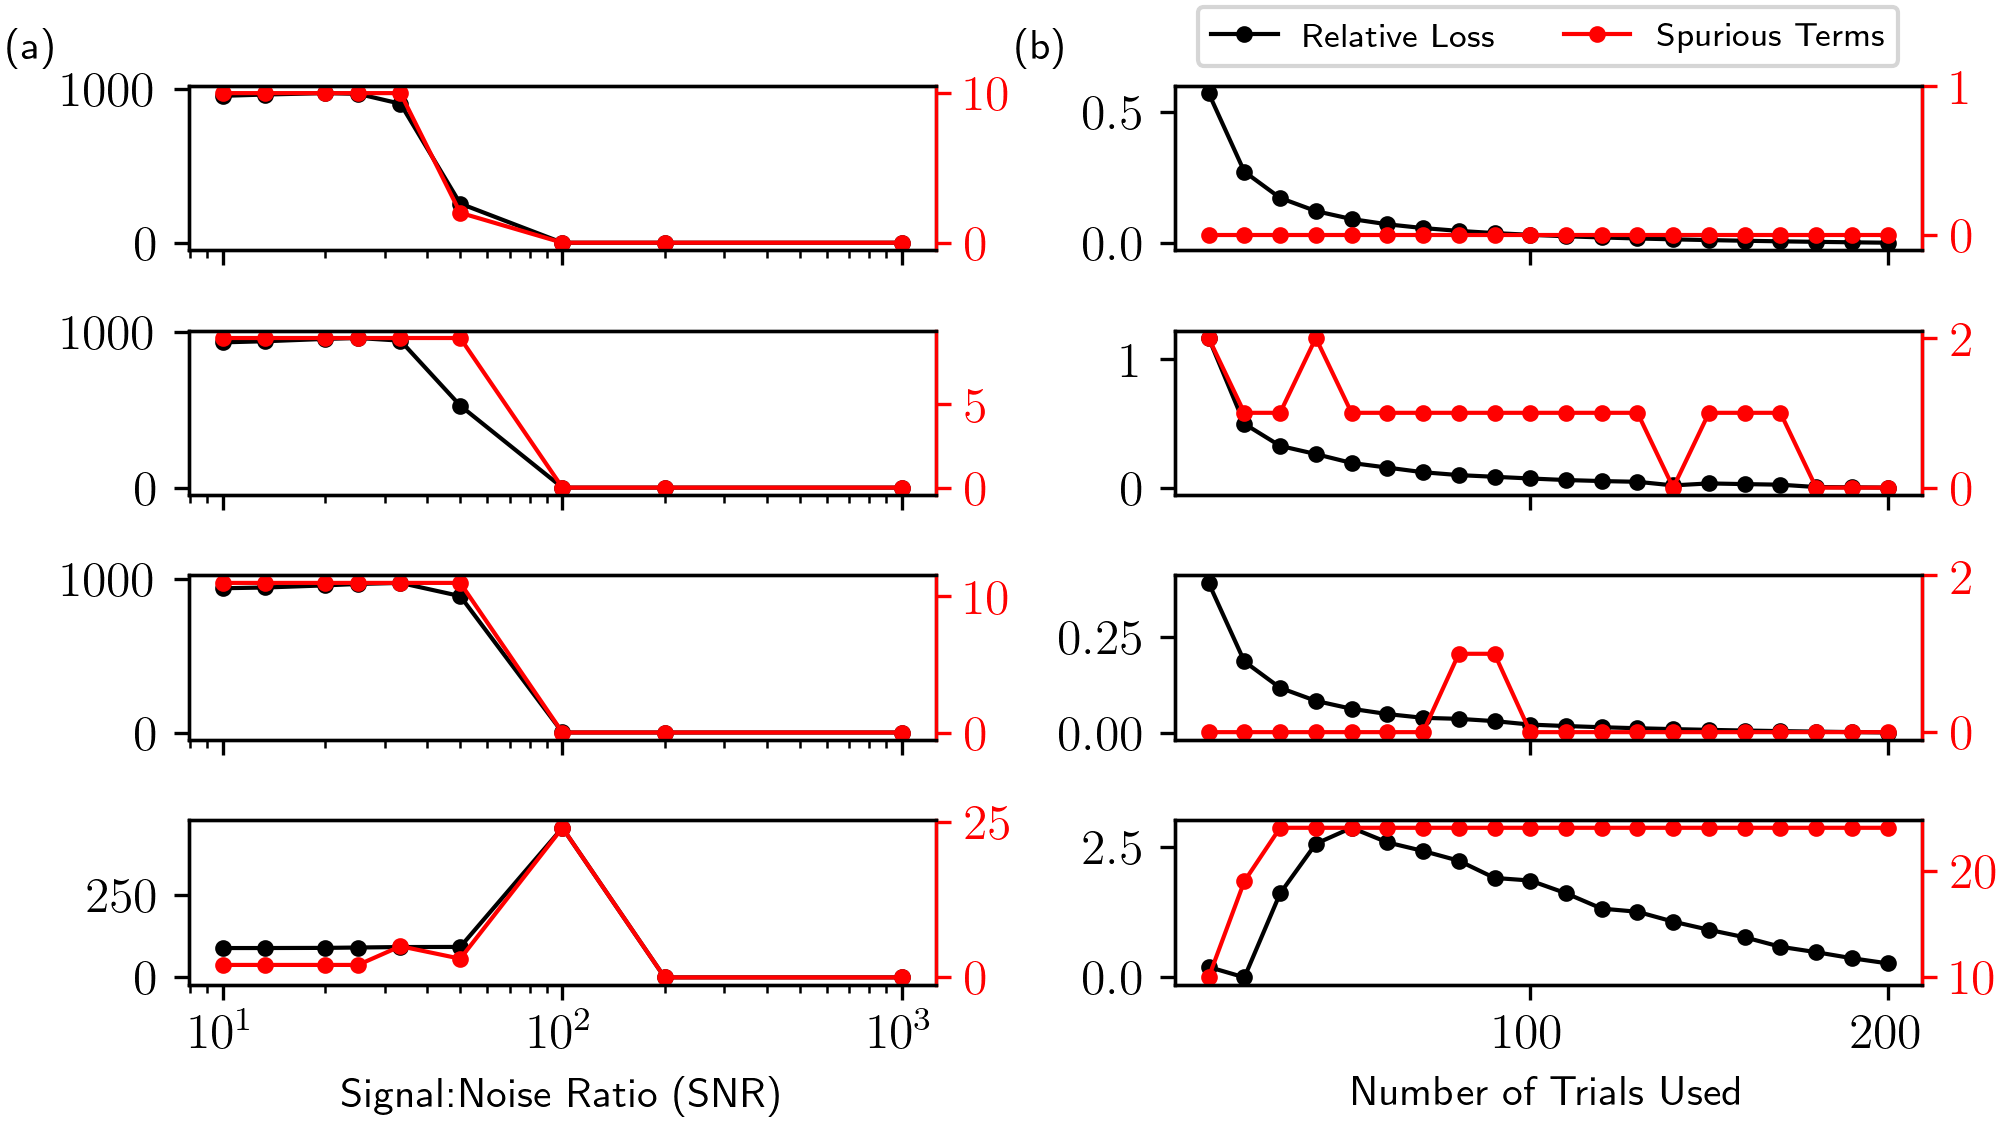

In [11]:
full_params['figure.figsize'] = (7,4)
full_params['lines.linewidth'] = 1
full_params['lines.markersize'] = 3
plt.rcParams.update(full_params)

# Plot line style for loss lines:
pltstyle=dict(linestyle=None,marker='o')

# Create figure
fig, axs = plt.subplots(4,2, sharex='col')

# Grab the axes for each of the two parts of the figure:
axs_4a = axs[:,0].flatten()
axs_4b = axs[:,1].flatten()

# Label (a):
axs_4a[0].text(0.03, 0.92, "(a)", transform=fig.transFigure)

for ax1, plot_list in zip(axs_4a,plot_lists_4a):
    # Get the results:
    plot_nm, plot_losses, plot_spurious = plot_list
    
    # set up second axis:
    ax2 = ax1.twinx()
    
    ax1.semilogx(plot_nm, plot_losses, color='black', label = "PDE Find Loss Error", **pltstyle)
    ax2.semilogx(plot_nm, plot_spurious, color='red', label="# Spurious Terms", **pltstyle)

    # Set right spine to red color and text
    ax2.spines['right'].set_color('red')
    ax2.tick_params(axis='y', colors='red')
    
    # Place the legend
    lines = ax1.get_lines()+ax2.get_lines()
    labels = [line.get_label() for line in lines]
    labels = ['' for line in lines]

# Set X-axis label
axs_4a[-1].set_xlabel("Signal:Noise Ratio (SNR)")

# Label (b):
axs_4b[0].text(0.51, 0.92, "(b)", transform=fig.transFigure)

for i, (ax1, plot_list) in enumerate(zip(axs_4b, plot_lists_4b)):
    # Get the results:
    plot_trials, plot_losses, plot_spurious = plot_list
    
    # set axes
    ax2 = ax1.twinx()
    
    l1 = ax1.plot(plot_trials, plot_losses, color='black', label = "Relative Loss", **pltstyle)
    l2 = ax2.plot(plot_trials, plot_spurious, color='red', label="Spurious Terms", **pltstyle)
    
    # Set right spine to red color and text
    ax2.spines['right'].set_color('red')
    ax2.tick_params(axis='y', colors='red')
    
    # Place the legend
    lines = ax1.get_lines()+ax2.get_lines()
    labels = [line.get_label() for line in lines]
    labels = ['' for line in lines]
    
    if i == 0:
        ax2.set_ylim([-0.1,1])
    if i == 2:
        ax2.set_ylim([-0.1,2])

# Set X-axis label
axs_4b[-1].set_xlabel("Number of Trials Used")

plt.tight_layout()

axs_4b[0].legend(handles=[l1[0],l2[0]], loc='center', bbox_to_anchor=(0.5,1.3), ncol=2, fontsize=8)

## Save figure
plt.savefig('./Figs/Fig4v2.png', dpi=600, transparent=True)

plt.show()